In [1]:
import numpy as np
import statsmodels.api as sm

# Part 1

In [16]:
rng = np.random.default_rng(987)

In [19]:
nobs = 100

X = rng.random((nobs,2))

X = sm.add_constant(X) # adds column of ones

X[:5]

array([[1.        , 0.01599711, 0.8209245 ],
       [1.        , 0.95030422, 0.00180159],
       [1.        , 0.57569728, 0.67148264],
       [1.        , 0.34051794, 0.65394525],
       [1.        , 0.71661607, 0.55723337]])

In [21]:
beta = [1, 0.1, 0.5]

e = rng.random(nobs)

In [22]:
y = np.dot(X, beta) + e

#### In mathematics, the dot product or scalar product is an algebraic operation that takes two equal-length sequences of numbers (usually coordinate vectors) and returns a single number. 

In [24]:
y.shape

(100,)

In [27]:
1+0.1*0.01599711+0.5*0.8209245


1.4120619609999998

In [30]:
np.dot(X, beta)[:5]

array([1.41206196, 1.09593122, 1.39331105, 1.36102442, 1.35027829])

In [32]:
# Fit regression model

model = sm.OLS(y,X)
result = model.fit()

In [34]:
result.params

array([1.47250528, 0.06578715, 0.58140033])

In [36]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.238
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     15.17
Date:                Thu, 23 Jul 2020   Prob (F-statistic):           1.85e-06
Time:                        22:56:57   Log-Likelihood:                -14.980
No. Observations:                 100   AIC:                             35.96
Df Residuals:                      97   BIC:                             43.78
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4725      0.083     17.786      0.000       1.308       1.637
x1             0.0658      0.097      0.676      0.500      -0.127       0.259
x2             0.5814      0.106      5.500      0.000       0.372       0.791
==============================================================================
Omnibus:                       19.534   Durbin-Watson:                   1.758
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                5.581
Skew:                           0.224   Prob(JB):                       0.0614
Kurtosis:                       1.933   Cond. No.                         5.82
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
dir(result)

['HC0_se',
 'HC1_se',
 'HC2_se',
 'HC3_se',
 '_HCCM',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_data_attr',
 '_get_robustcov_results',
 '_is_nested',
 '_use_t',
 '_wexog_singular_values',
 'aic',
 'bic',
 'bse',
 'centered_tss',
 'compare_f_test',
 'compare_lm_test',
 'compare_lr_test',
 'condition_number',
 'conf_int',
 'conf_int_el',
 'cov_HC0',
 'cov_HC1',
 'cov_HC2',
 'cov_HC3',
 'cov_kwds',
 'cov_params',
 'cov_type',
 'df_model',
 'df_resid',
 'diagn',
 'eigenvals',
 'el_test',
 'ess',
 'f_pvalue',
 'f_test',
 'fittedvalues',
 'fvalue',
 'get_influence',
 'get_prediction',
 'get_robustcov_results',
 'initialize',
 'k_constant',
 'llf',
 'load',

# Part 2

Notice that we called statsmodels.formula.api in addition to the usual statsmodels.api. In fact, statsmodels.api is used here only to load the dataset. The formula.api hosts many of the same functions found in api (e.g. OLS, GLM), but it also holds lower case counterparts for most of these models. In general, lower case models accept formula and df arguments, whereas upper case ones take endog and exog design matrices. formula accepts a string which describes the model in terms of a patsy formula. df takes a pandas data frame.

dir(smf) will print a list of available models.

Formula-compatible models have the following generic call signature: (formula, data, subset=None, *args, **kwargs)

In [2]:
import statsmodels.formula.api as smf
import pandas as pd

In [3]:
df = sm.datasets.get_rdataset("Guerry", "HistData").data

df = df[['Lottery', 'Literacy', 'Wealth', 'Region']].dropna()

df.head()

,Lottery,Literacy,Wealth,Region
0,41,37,73,E
1,38,51,22,N
2,66,13,61,C
3,80,46,76,E
4,79,69,83,E


In [4]:
df.Region.unique()

array(['E', 'N', 'C', 'S', 'W'], dtype=object)

In [5]:
print(df.shape)
df.dtypes

(85, 4)


Lottery      int64
Literacy     int64
Wealth       int64
Region      object
dtype: object

In [6]:
model_ols = smf.ols('Lottery ~ Literacy + Wealth + Region', data = df)
res = model_ols.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Lottery   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.287
Method:                 Least Squares   F-statistic:                     6.636
Date:                Tue, 11 Aug 2020   Prob (F-statistic):           1.07e-05
Time:                        12:40:38   Log-Likelihood:                -375.30
No. Observations:                  85   AIC:                             764.6
Df Residuals:                      78   BIC:                             781.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      38.6517      9.456      4.087      0.000      19.826      57.478
Region[T.E]   -15.4278      9.727     -1.586      0.117     -34.793       3.938
Region[T.N]   -10.0170      9.260     -1.082      0.283     -28.453       8.419
Region[T.S]    -4.5483      7.279     -0.625      0.534     -19.039       9.943
Region[T.W]   -10.0913      7.196     -1.402      0.165     -24.418       4.235
Literacy       -0.1858      0.210     -0.886      0.378      -0.603       0.232
Wealth          0.4515      0.103      4.390      0.000       0.247       0.656
==============================================================================
Omnibus:                        3.049   Durbin-Watson:                   1.785
Prob(Omnibus):                  0.218   Jarque-Bera (JB):                2.694
Skew:                          -0.340   Prob(JB):                        0.260
Kurtosis:                       2.454   Cond. No.                         371.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
my_df = pd.DataFrame({"OLS_params": res.params})
my_df

,OLS_params
Intercept,38.651655
Region[T.E],-15.427785
Region[T.N],-10.016961
Region[T.S],-4.548257
Region[T.W],-10.091276
Literacy,-0.185819
Wealth,0.451475


# categorical variables

If Region had been an integer variable that we wanted to treat explicitly as categorical, we could have done so by using the C() operator:

res = smf.ols(formula='Lottery ~ Literacy + Wealth + C(Region)', data=df).fit()

# Part 3

In [26]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

from sklearn.datasets import load_boston
boston_dataset = load_boston() 

boston = pd.DataFrame(data=boston_dataset.data, columns=boston_dataset.feature_names)

boston["MEDV"] = boston_dataset.target

In [27]:
print(boston.shape)
boston.head()

(506, 14)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [29]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

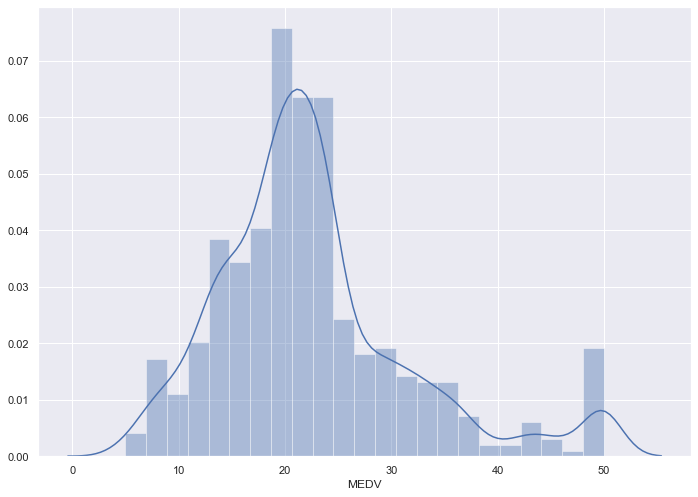

In [33]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston["MEDV"], bins = 23)

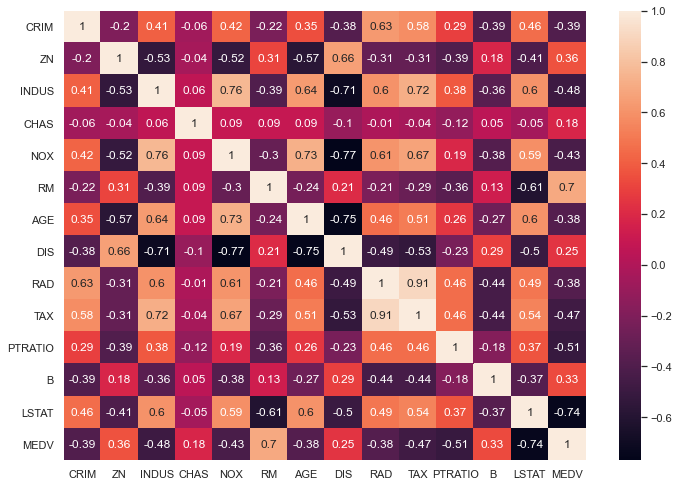

In [35]:
correlation_matrix = boston.corr().round(2)

sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.heatmap(data=correlation_matrix, annot=True)

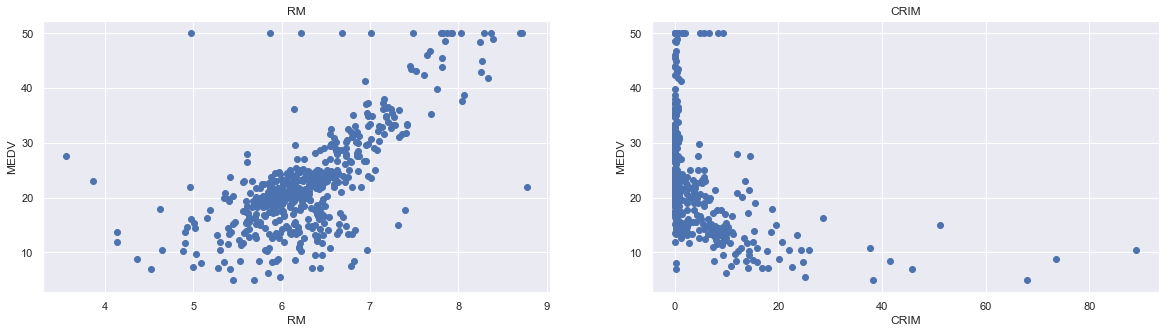

In [41]:
plt.figure(figsize=(20, 5))

features = ['RM', 'CRIM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1,len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

### Apply Log Transformation

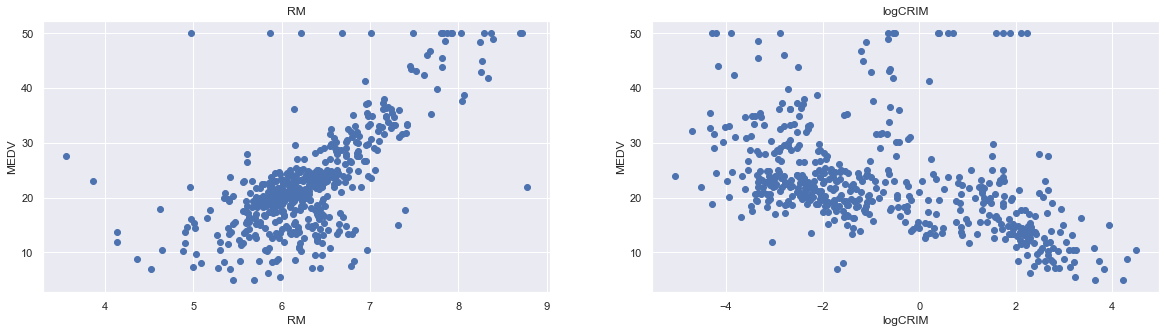

In [42]:
boston['logCRIM'] = np.log(boston['CRIM'])

plt.figure(figsize=(20, 5))

features = ['RM', 'logCRIM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1,len(features), i+1)
    x = boston[col]
    y = target
    plt.scatter(x,y)
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')


When our original continuous data do not follow the bell curve, we can log transform this data to make it as “normal” as possible so that the statistical analysis results from this data become more valid. In other words, the log transformation reduces or removes the skewness of our original data. **The important caveat here is that the original data has to follow or approximately follow a log-normal distribution. Otherwise, the log transformation won’t work.
Image for post**

# Notes

# Interaction
In general, when including interactions in a regression model, it is good to
center the predictor variables before taking the product, i.e. subtract the
mean of x1 from every value in x1, and similarly for x2. After doing this,
the main effects gain a clear interpretation – b1 is the slope of E[y|x1, x2] on
x1 when x2 is held fixed at its mean, and b2 is the slope of E[y|x1, x2] on x2
when x1 is held fixed at its mean. The coefficient b3 continues to describe
how these slopes change when the other variable is held fixed at a value that
is different from its mean value.


# Model diagnostics

A scatterplot of the residuals against the fitted values can be very informative about the structure of the fitted model. In particular, if the degree of
scatter in this plot increases (or decreases) from left to right, we have discovered a mean/variance relationship. This implies that not only is the variance
not constant (i.e. there is heteroscedasticity), but also that the conditional
variances differ in a way that is predictable from the mean. This is an important discovery that adds depth to our understanding of the population
under study. Moreover, knowing that a mean/variance relationship is present
indicates that while the linear least squares estimates of the regression parameters are meaningful, their standard errors may not be correct, and we
should not rely on the results obtained from standard procedures for statistical inference in linear models. Fortunately, alternative procedures that are
“robust” to this heteroscedasticity are available, but this is a more advanced
topic that we will not cover further here.

Scatterplots of the residuals on individual covariates can sometimes reveal
nonlinear structure that the model failed to capture. If, for example, there is
a strongly curved or “U-shaped” relationship between the residuals and the
values of a covariate, say x2, then it may be advisable to include $x_2^2$ or some
other transformed version of x2 in the model.

An added variable plot is one type of “regression graphic” that aims to
reveal the structure of the regression relationship between the dependent
variable y and any one of the independent variables, while controlling for the
other predictor variables. It can be used to assess whether the relationship
is linear or curvilinear. We will not discuss the details of how an added
variable plot is constructed, but to use an added variable plot, we can inspect
the plot for signs of substantial curvature. If such features are evidence, it
may be advisable to transform the data or otherwise modify the model to
accommodate it
